## Problem Statement:
# In today’s digital economy, credit card transactions have become an important part of daily life, offering convenience to consumers and efficiency to businesses. However, the increasing volume of these transactions has led to a corresponding rise in credit card fraud, posing significant financial risks to both consumers and financial institutions.
# Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it!
# Aim: The objectives of this project are to;

# * Perform Feature selection to get the best features for building an accurate model
# * Use feature selection techniques like correlation plot and ANOVA test to select the best features for building the model
# * Compare the accuracy from the models built from each features produced by the correlation plot and ANOVA test
# * Develop a robust machine learning model that can accurately detect and predict fraudulent credit card transactions in real-time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('creditcard_2023.csv')

In [18]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df = df.drop('id', axis = True)

# The dataset contains 31 columns and the columns named V1-V28 were hidden for security reasons. other columns include;
# Amount - Transaction Amount
# Class - Fraud (1) or otherwise (0)

In [9]:
df.shape

(568630, 31)

In [57]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [16]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

## Target Variable analysis

<Axes: ylabel='count'>

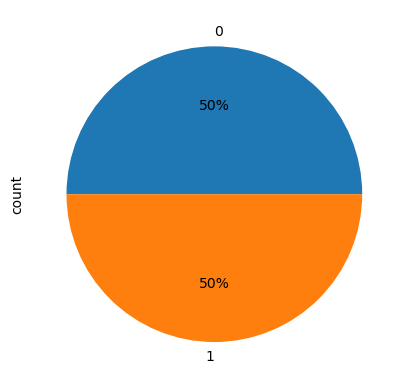

In [28]:
df['Class'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

# The data is evenly balanced for both fraud and No fraud cases, which means our Target variable is unbiased and good for prediction.

## FEATURE SELECTION

# Correlation Map: we will plot the correlation map only with the target variable

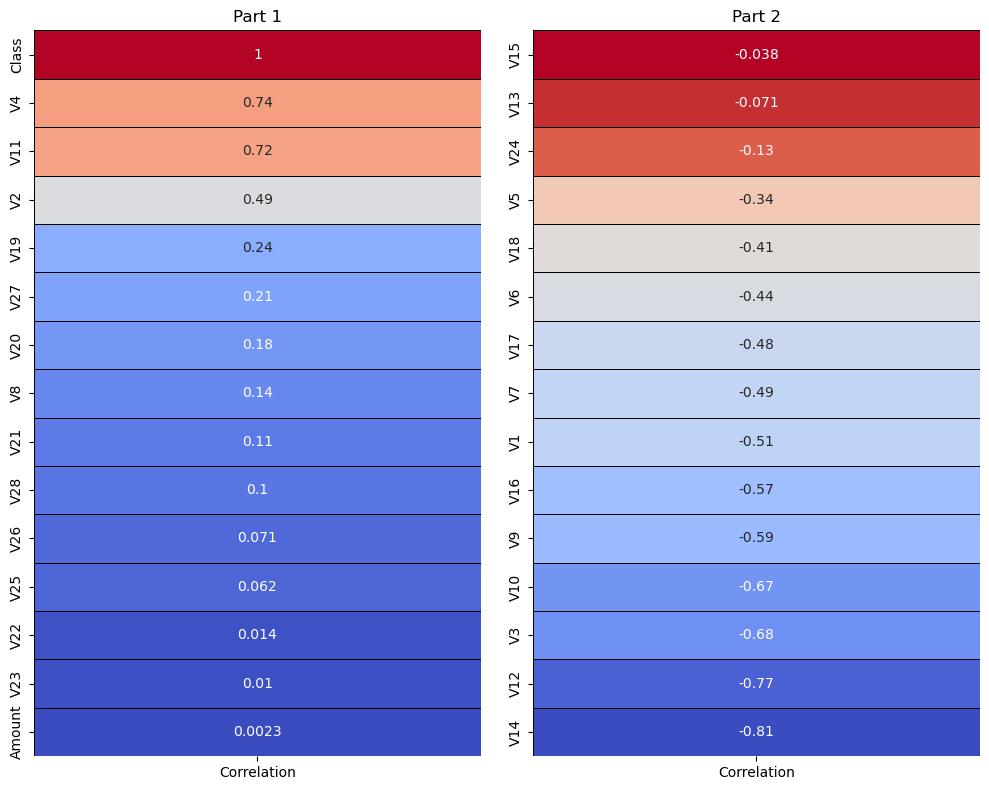

In [9]:

corr = df.corrwith(df['Class']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']

colors = 'coolwarm'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.heatmap(corr.iloc[:15, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 1')

plt.subplot(1, 2, 2)
sns.heatmap(corr.iloc[15:30, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 2')

fig.tight_layout(w_pad=2)
plt.show()


# For feature selection, we will be selecting only the features that have positive correlation with the target variable and correlation from 0.01. which are:
# V4, V11, V2, V19, V27, V20, V8, V21, V28, V26, V25, V22, V23.
# only 13 features will be used to predict the target variable (Class).

## ANOVA TEST:
# The ANOVA (Analysis of Variance) test is a statistical method used to determine whether there are significant differences between the means of three or more independent groups. It essentially tests the null hypothesis that the means of different groups are equal

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

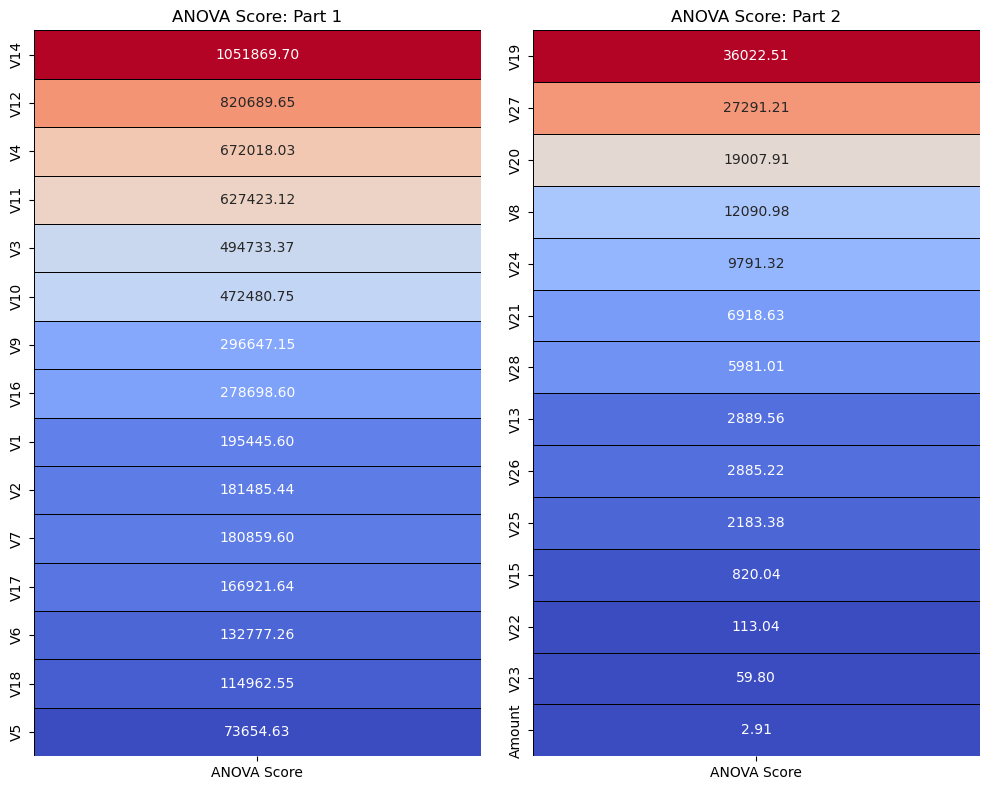

In [13]:
# Extract features and target from the dataset
features = df.loc[:, :'Amount']
target = df.loc[:, 'Class']

# Perform feature selection using ANOVA F-test
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame to store the ANOVA scores
feature_scores = pd.DataFrame({
    'ANOVA Score': fit.scores_
}, index=features.columns)

# Sort the features based on their ANOVA scores
feature_scores = feature_scores.sort_values(by='ANOVA Score', ascending=False)

# Set up the figure and axes for the heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Plot the first heatmap for the top 15 features
sns.heatmap(feature_scores.iloc[:15, :], annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('ANOVA Score: Part 1')

# Plot the second heatmap for the next 15 features
sns.heatmap(feature_scores.iloc[15:30, :], annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('ANOVA Score: Part 2')

# Adjust the layout for better spacing
fig.tight_layout(w_pad=2)

# Display the plots
plt.show()


# The Higher the value of the ANOVA score, the higher the importance of that feature with the target variable.
# From the above plot, we will reject features with values less than 10000.
# In this case, we will create 2 models based on features selected from the Correlation Plot & ANOVA Score

# Dataset for model Based on Correlation plot:

In [7]:
cp = df[['V2','V4','V8','V11','V19','V20','V21','V22','V23','V25','V26','V27','V28','Class']].copy(deep=True)
cp.head()

,V2,V4,V8,V11,V19,V20,V21,V22,V23,V25,V26,V27,V28,Class
0,-0.469648,-0.083724,-0.130006,-0.987020,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.126280,-0.434824,-0.081230,-0.151045,0
1,-0.356045,-0.429654,-0.133118,0.140107,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,0.190090,0.296503,-0.248052,-0.064512,0
2,-0.949385,-0.457986,-0.095576,-0.272985,-2.366079,0.361652,-0.005020,0.702906,0.945045,-0.605564,-0.312895,-0.300258,-0.244718,0
3,-0.508959,-1.090178,-0.065130,-0.752581,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,1.003963,-0.515950,-0.165316,0.048424,0
4,-0.165280,-0.448293,-0.212660,-1.203171,0.445317,0.247237,-0.106984,0.729727,-0.161666,-0.414116,1.071126,0.023712,0.419117,0


# Dataset for model Based on Anova analysis:

In [9]:
ap = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V14','V16','V17','V18','V19','V20','V27','Class']].copy(deep = True)
ap.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V27,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,0.549020,0.215598,0.512307,0.333644,0.124270,0.091202,-0.081230,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.627719,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.248052,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.616874,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.300258,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.559535,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.165316,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,0.241454,0.224538,0.366466,0.291782,0.445317,0.247237,0.023712,0


## MODELLING

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## Predictions using the Correlation plot data 

In [13]:
cp.head()

,V2,V4,V8,V11,V19,V20,V21,V22,V23,V25,V26,V27,V28,Class
0,-0.469648,-0.083724,-0.130006,-0.987020,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.126280,-0.434824,-0.081230,-0.151045,0
1,-0.356045,-0.429654,-0.133118,0.140107,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,0.190090,0.296503,-0.248052,-0.064512,0
2,-0.949385,-0.457986,-0.095576,-0.272985,-2.366079,0.361652,-0.005020,0.702906,0.945045,-0.605564,-0.312895,-0.300258,-0.244718,0
3,-0.508959,-1.090178,-0.065130,-0.752581,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,1.003963,-0.515950,-0.165316,0.048424,0
4,-0.165280,-0.448293,-0.212660,-1.203171,0.445317,0.247237,-0.106984,0.729727,-0.161666,-0.414116,1.071126,0.023712,0.419117,0


In [17]:
x = cp.drop('Class', axis = 1)
y = cp['Class']

In [19]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify = y)

In [21]:
def evaluate_model(true, predicted):
    class_report = classification_report(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    return accuracy, precision, class_report

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier()
    }
model_list = []
accuracy_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy, precision, class_report = evaluate_model(y_train, y_train_pred)
    accuracy, precision, class_report = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))
    accuracy_list.append(accuracy)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9253
- Precision: 0.9354
- Class_report:               precision    recall  f1-score   support

           0       0.92      0.94      0.93     56863
           1       0.94      0.91      0.92     56863

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726

----------------------------------
Model performance for Test set
- Accuracy: 0.9253
- Precision: 0.9354
- Class_report:               precision    recall  f1-score   support

           0       0.92      0.94      0.93     56863
           1       0.94      0.91      0.92     56863

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726



KNN
Model performance for Training set
- Accuracy: 0.9973
- Precision: 0.9946
- Class_report:               preci

In [25]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
2,Random Forest,0.999560
1,KNN,0.997274
3,Decision Trees,0.995287
0,Logistic Regression,0.925312


# The four models built with the correlation plot data, each produced an accuracy above 90%, with the least accuracy (Logistic Regression) being 92% and the highest (Random Forest) 99.9%

In [27]:
ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)
y_pred = ran_for.predict(x_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.95


<Axes: >

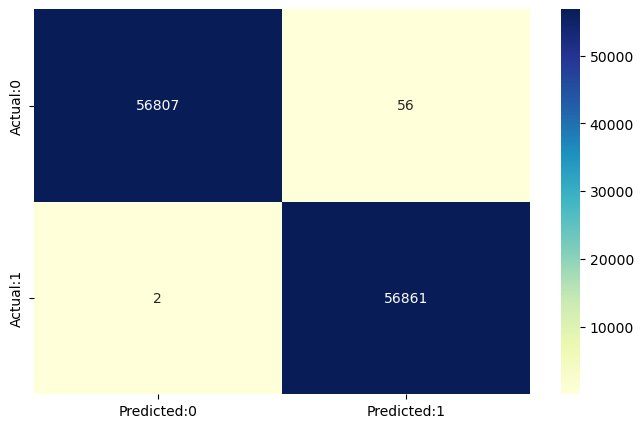

In [29]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [31]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
510747,1,1,0
390373,1,1,0
81077,0,0,0
236854,0,0,0
407198,1,1,0
...,...,...,...
260738,0,0,0
326576,1,1,0
498586,1,1,0
443122,1,1,0


In [33]:
pred_df['Difference'].value_counts()

Difference
 0    113668
-1        56
 1         2
Name: count, dtype: int64

# Using the Random Forest model to predict the test data, it performed excellently with an accuracy of 99.95%

## Prediction using the ANOVA Data 

In [42]:
ap.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V27,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,0.549020,0.215598,0.512307,0.333644,0.124270,0.091202,-0.081230,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.627719,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.248052,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.616874,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.300258,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.559535,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.165316,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,0.241454,0.224538,0.366466,0.291782,0.445317,0.247237,0.023712,0


In [44]:
x = ap.drop('Class', axis = 1)
y = ap['Class']

In [46]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify = y)

In [48]:
def evaluate_model(true, predicted):
    class_report = classification_report(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    return accuracy, precision, class_report

In [50]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier()
    }
model_list = []
accuracy_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy, precision, class_report = evaluate_model(y_train, y_train_pred)
    accuracy, precision, class_report = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))
    accuracy_list.append(accuracy)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9649
- Precision: 0.9787
- Class_report:               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

----------------------------------
Model performance for Test set
- Accuracy: 0.9649
- Precision: 0.9787
- Class_report:               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



KNN
Model performance for Training set
- Accuracy: 0.9989
- Precision: 0.9977
- Class_report:               preci

In [52]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
2,Random Forest,0.999798
1,KNN,0.998866
3,Decision Trees,0.997811
0,Logistic Regression,0.964889


# The four models built with the ANOVA test data, each produced an accuracy above 95%, with the least accuracy (Logistic Regression) being 96.5% and the highest (Random Forest) 99.98%

In [54]:
ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)
y_pred = ran_for.predict(x_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.98


<Axes: >

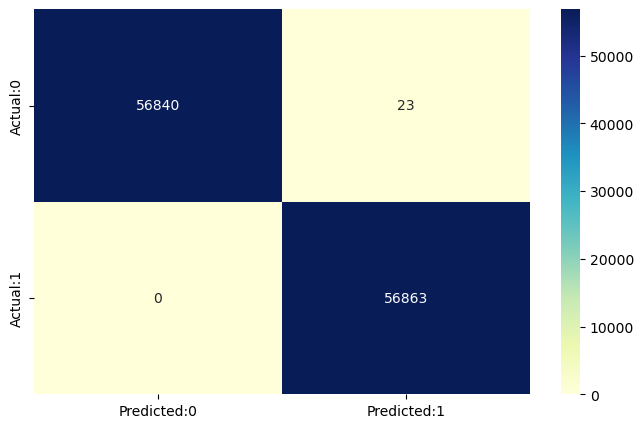

In [56]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [58]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
510747,1,1,0
390373,1,1,0
81077,0,0,0
236854,0,0,0
407198,1,1,0
...,...,...,...
260738,0,0,0
326576,1,1,0
498586,1,1,0
443122,1,1,0


In [60]:
pred_df['Difference'].value_counts()

Difference
 0    113703
-1        23
Name: count, dtype: int64

# Using the Random Forest model to predict the test data, it performed excellently with an accuracy of 99.98%

## Conclusion

# The correlation plot and ANOVA test techniques both produced extremely accurate features for building the predictive model, even though the ANOVA test model had a slightly higher accuracy. This experiment highlights the importance of feature selection in building an accurate predictive model.